<a href="https://colab.research.google.com/github/lauracline/Statistical-Learning-Cookbooks/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Used to predict quanitiative (numerical) response.


*   Can we determine if a relationship exists between predictors and response?
*   How strong is this relationship?
*   Which predictors are related to the response?
*   How accurate are predictions once a model is fit?
*   Is a linear model appropriate?
*   Are there interaction effects?


# **Simple Linear Regression**

This simply means one predictor is linearly related to the response. 

$Y = \beta_0 + \beta_1X + \epsilon$

There are two unknown contants that we need to estimate, the intercept $\beta_0$ and the slope $\beta_1$. Also called coefficients or parameters. Once they are estimated, the estimated fit becomes

$\hat{Y} = \hat{\beta_0} + \hat{\beta_1}X$

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
adv = pd.read_csv('https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Advertising.csv')
adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


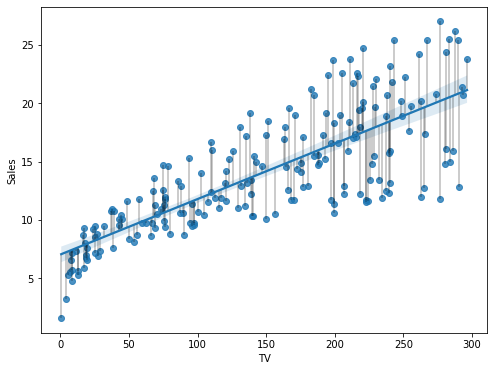

In [6]:
fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)
y_hat = fit[1] + adv['TV'] * fit[0]

plt.figure(figsize=(8,6))
sns.regplot('TV', 'Sales', data=adv)
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw = .4)

In [7]:
fit

array([0.04753664, 7.03259355])

## **Quantifying Best Line**

Many lines can be arbitrarily drawn through the advertising data above. Typically the line that minimizes the sum of squared error (also called the residual sum of squares (RSS)) between the points and the estimated line is used. But you are free to choose the line of your choice when modeling. Least absolute error, connecting a line through the first and last point, a hand drawn line are different ways you could model the relationship. 

The line above was fitted using numpy's polyfit function, with a final model of $\hat{Y} = 7 + .055X$. For every one unit increase in X a 0.055 increase in Sales would happen. Since the data is in the thousands, every $1,000 dollars in advertising spent corresponds to an increase of 55 sales. 

## **Different Parameter Values**

Different values of the parameter's each produce different values of the mean squared error (the metric used to determine best fit). The work below outlines a number of combinations of both $\hat{\beta_0}$ and $\hat{\beta_1}$ through contour lines that show the error at each combination and a corresponds 3D plot. The central point in each figure is the point where MSE is minimized. 

In [8]:
b0 = np.linspace(5, 9, 50)
b1 = np.linspace(.03, .07, 50)

In [9]:
errors = np.array(
    [np.mean((adv['Sales'].values - (b_0 + b_1 * adv['TV'].values)) ** 2) 
    for b_1 in b1 for b_0 in b0])

In [10]:
B0, B1 = np.meshgrid(b0, b1)

In [11]:
errors_mesh = errors.reshape(B0.shape)

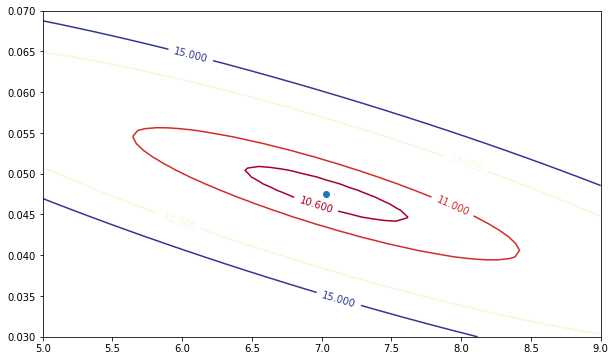

In [12]:
cmap = plt.cm.RdYlBu
plt.figure(figsize=(10,6))
cs = plt.contour(B0, B1, errors_mesh, cmap=cmap, levels=[10.6, 11, 13, 15])
manual_locations = [(7, .05)]
plt.clabel(cs, inline=1, fontsize=10)
plt.scatter(fit[1], fit[0])

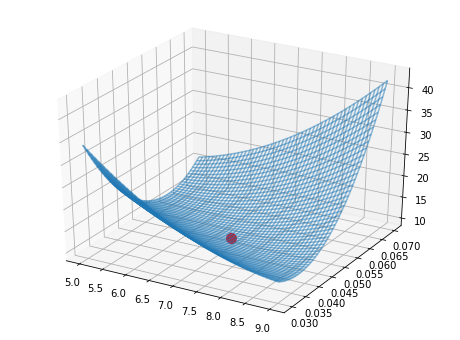

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(fit[1], fit[0], errors_mesh.min(), s=100, c='r')
ax.plot_wireframe(B0, B1, errors_mesh, alpha=.5)

## **True Regression Line**

The theoretical best linear relationship can be defined as:

$Y = \beta_0 + \beta_1X + \epsilon$

This 'population regression line' will never be known in practice and remain unobserved unless it came from simulated data. 

**Unbiased** - an estimator that doesn't systematically over or under estimate the value of the parameter it is estimating. 

### **How accurate is our estimators?**

It's great that our linear regression model using least-squares produced a line that looks like, but how much will this line expect to vary from sample to sample. 

In the case of estimating a sample mean $\hat{\mu}$ from a number of points *n*, we get that the $Var(\hat{\mu}) = \frac{\sigma^2}{n}$ where $\sigma$ is the standard distribution of the original set of *n* points. The square root of this value is called the "standard error" and gives us a rough idea of how much the estimator will change from sample to sample. 

### **Confidence intervals of estimators**

Knowing how to derive our standard error and assuming the errors are Gaussian we can generate a confidence interval based on the t-distribution. For instance, approximately 95% of all samples will be contained in the following interval: $\beta_1 \pm 2*SE(\beta_1)$. 

### **Using standard errors for hypothesis testing**

If the standard error is large and the estimated value small then the estimator might not be significantly different than 0, meaning is is statistically insignificant. To test significance a hypothesis test can be done on the different predictors. The hypothesis test is usually done to test whether the predictor is different than 0. The null hypothesis

$H_0: \beta_1 = 0$

is tested against the alternative

$H_a: \beta_1 \neq 0$

To test this we find out how many standard errors our parameter is away from 0. $\frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$

This result is a t-statistic. The t-distribution is then used to determine the percentage of time that a random value would fall beyond this t-statistic. This percentage is called the **p-value** and used as a measure of how extreme the results of your data are. The smaller the p-value the more extreme the results and the more likely they did not come from randomness. 

###  **What p-value is good enough?**

The most standard p-value that you will encounter in the real world is .05, which means that if you can demonstrate that there is at least a 95% chance that your estimtor did not arise from randomness, you will reject the null hypothesis and note that there is a statistically significant difference between your estimator and 0.


### **Cautionary tales of p-values**

95% sounds pretty solid until you realize that there are millions of studies that have been done and just by randomness 5% will have falsely concluded statistically significance when there was none. Below is some work that shows (using a binomial distribution that when tossing a fair coin 100 times, there is just about a 95% chance that you will get between 41 and 59 heads/tails. This means tossing 40 or less or 60 or more coins could generate a p-value of .05 or less. Would you be satisfied with someone telling you a coin was biased after getting 60 heads? This effect is compounded in real life experiments where there are lots of unknowns and lots of assumptions that are getting violated. Maybe enforcing a p-value of .01 would be a better choice. 

In [14]:
# Calculate exact probability using a binomial distribution for 
# those between 41 and 59
from scipy.special import comb
probs = [comb(100, i) * .5 ** 100 for i in range(41,60)]

In [15]:
# What is the probability of generating between 41 and 59 heads?
sum(probs)

0.9431120663590192

In [16]:
# Simulate some data. Toss a coin 100 times and find percentage of heads
# Do this 1000 times and see how many trials have 60 or more heads
# About 3% of the time we will have concluded the coin is biased when
# it is not!
((np.random.rand(1000,100) > .5).mean(1) >= .6).mean()

0.024

## **Accuracy of the Model**

Above we discussed the accuracy and significance of the parameters in the model. Now to discuss the accuracy of the model. One simply way is to look at the regression line drawn through the points - the first plot in this notebook. We can see that the data is still quite noisy and there will be a high degree of variance no matter where we are on the line. 

### **How much better than randomness?**

One direct way of measuring the model is to find out how much better the model does than randomness. For this, we must have a model for randomness - and that model is not just randomly choosign a point but is choosing the mean of all points. 

Text(0.5, 1.0, 'Model for Randomness: Mean')

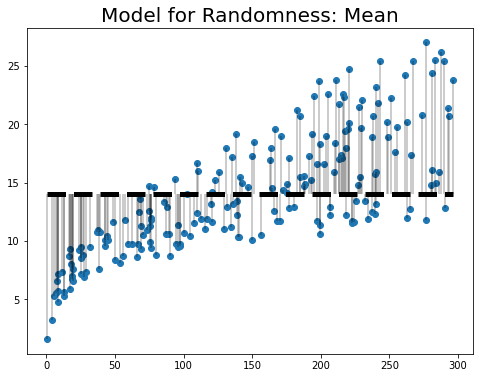

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(adv['TV'], adv['Sales'])
plt.hlines(adv['Sales'].mean(), adv['TV'].min(), adv['TV'].max(), linestyle='--', lw=5)
plt.vlines(adv['TV'], adv['Sales'].mean(), adv['Sales'], lw=.4)
plt.title("Model for Randomness: Mean", fontsize=20)

Text(0.5, 1.0, 'Linear Regression Model')

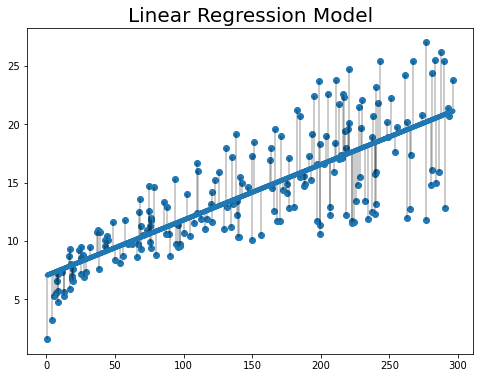

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(adv['TV'], adv['Sales'])
plt.plot(adv['TV'], adv['TV'] * fit[0] + fit[1], lw=5)
plt.vlines(adv['TV'], adv['TV'] * fit[0] + fit[1], adv['Sales'], lw=.4)
plt.title("Linear Regression Model", fontsize=20)

## **Errors Using the Mean and Errors Using the Model**

As you can see above the errors when using the mean are greater than the errors using the model. Let's plot a histogram of the absolute value of the errors of each to more easily view what is taking place. Looking at the histogram it obvious that a model is producing a better fit. 

In [19]:
errors_mean = abs(adv['Sales'] - adv['Sales'].mean())
errors_model = abs(adv['Sales'] - adv['TV'] * fit[0] + fit[1])

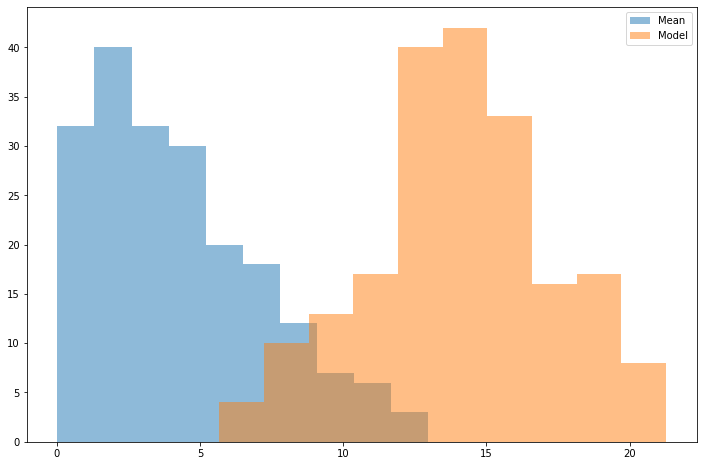

In [20]:
plt.figure(figsize=(12,8))
plt.hist(errors_mean, alpha = .5, label = "Mean")
plt.hist(errors_model, alpha= .5, label = "Model")
plt.legend()

In [21]:
# How often is the model better
# Somewhat surprisingly, only 1% of the time, the model is better than
# the mean
(errors_model < errors_mean).mean()

0.01

## **How Much Better than the SST**

The sum of squares total (SST) is defined by the sum of all the squared deviations from the mean. This serves as a baseline as to how much variance there is in the model. $\sum(y - \hat{y})^2$. The sum of squares error (SSE) is how much error there is in the model. The difference between the predicted and observed values $\sum(\hat{y} - y)^2$. The sum of squares regression (SSR) is defined as the sum of the squared differences between the regression line and the mean. $\sum(\hat{y} - \overline{y})^2$. Mathematically we have the equality

$SST = SSR + SSE$

In [22]:
# Since we already have enough to calculate SST and SEE, let's do it
# Notice how much lower our SSE is. If SST is 0 that means we don't have a 
# perfect fit
SST = (errors_mean ** 2).sum()
SSE = (errors_model ** 2).sum()
SST, SSE

(5417.14875, 41668.42820491733)

$R^2$ is a statistic that can tell us what percentage of the total variation (SST) has been 'explained' by the model. Or what percentage of the variation (SST) was removed by using the model. If we calculate 1 - SSE / SST would give us the total variation captured in the model. A number close to 1 would indicate a better fit. For the current model we can say that none of the variation was explained by X (TV Advertising). 

In [23]:
# R-squared
1 - SSE / SST

-6.691948315969231

In [24]:
# F - Statistic MSR/MSE
MSR = (SST - SSE) / 1
MSE = SSE / (errors_model.size - 2)
F_stat = MSR/MSE
F_stat

-172.258797398712

### **Using the statsmodels api**

The excellent statsmodels library integrates neatly with the pandas DataFrame to do statistical analysis. 

In [25]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
results = smf.ols('Sales ~ TV', data=adv).fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        12:49:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results show that 81% of our variation can be explained by X (TV Advertising). 

In [28]:
# Simple linear regression with newspaper 
results = smf.ols('Sales ~ Newspaper', data = adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 30 Oct 2021   Prob (F-statistic):            0.00115
Time:                        12:49:49   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results show that 2% of the variation can be explained by X (Newspaper Advertising).

In [29]:
results = smf.ols('Sales ~ Radio', data = adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           4.35e-19
Time:                        12:49:49   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results show that 12% of our variation can be explained by X (Radio advertising). 

# **Multiple Regression**

Instead of running a simple linear model for each predictor, a model can be built that incorporates all of the predictors. Doing this results in Newspaper becoming insignificant. 

In [30]:
results = smf.ols('Sales ~ TV + Newspaper + Radio', data = adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        12:50:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Newspaper is least highly correlated with Sales
# Its relatively high correlation to Radio could be the reason it was 
# significant on its own and not when Radio was also in the model
adv.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


## **Null Hypothesis in Multiple Linear Regression**

The null hypothesis expands here to say that all coefficients are equal to 0. The alternative is only that at least one of them is significant. An F test is performed to test for significance. 

$F=\frac{(SST - SSE) / p}{SSE / (n - p - 1)}$

### **Selecting a Subset of a Model**

In the above model, Newspaper does not appear to have a relationship with sales and hence would be a good candidate to drop from our model. But of the number of predictors were more, it might be troubling to manually fit many models and hand select which variables to include in the model. Forward, backward, and mixed selection processes can be used to find a better model. All of these selection models make their variable selection based on some statistic - AIC, BIC, Mallows CP, Adjusted R Squared 

*   Forward - starts with an empty model and adds one variable at a time until the statistic is minimized 
*   Backward - starts with a full model and removes one variable at a time 
*   Mixed - starts empty and either removes or adds a variable at each step 

# **Categorical Predictor Variables**

Variables that are non-numeric or are numerical but represent categories are called categorical variables. Also called quanitative or factor variables.

In [35]:
credit = pd.read_csv('https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [39]:
credit['Female'] = (credit.Gender == 'Female').astype(int)

In [40]:
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [42]:
results = smf.ols('Balance ~ Female', data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Sat, 30 Oct 2021   Prob (F-statistic):              0.669
Time:                        12:51:50   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.000     444.675     574.931
Female        19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Same thing
credit[credit['Female'] == 0]['Balance'].mean(), credit[credit['Female'] == 1]['Balance'].mean()

(509.8031088082902, 529.536231884058)

# **The Broken Assumptions of a Linear Model**

There are several assumptions that are used when fitting a linear model.

*   The errors are normally distributed and have a constant variance 
*   The errors are not correlated with one another
*   The predictor variables are independent. An increase in one won't result in an increase in another 
*   The change in response for a one unit increase in X is the same no matter what the value of X

# **Challenging the Linearity Constraint Through Interaction Effects**

In linear regression with no interaction effects (no two predictors are multiplied together) and the assumption is that an increase in one unit in one variable will not have any effect on another variable. In many real world problems an increase in one variable might change the impact that another variable has on the response. To capture this in multiple regression, we multiply the predictors together. 

In [44]:
# Interaction model
results = smf.ols('Sales ~ TV + Radio + TV*Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sat, 30 Oct 2021   Prob (F-statistic):          6.68e-146
Time:                        12:52:10   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Polynomial Regression is Still Linear**

Despite the fact that the regression line can be visibly non-linear, the squaring predictor variables still means we are doing linear regression. The requirement for a regression to be 'linear' is to have it linear in the parameters. 

In [45]:
# Nonlinearity of data
resid = adv['Sales'] - results.predict(adv)

(-2.0, 2.0)

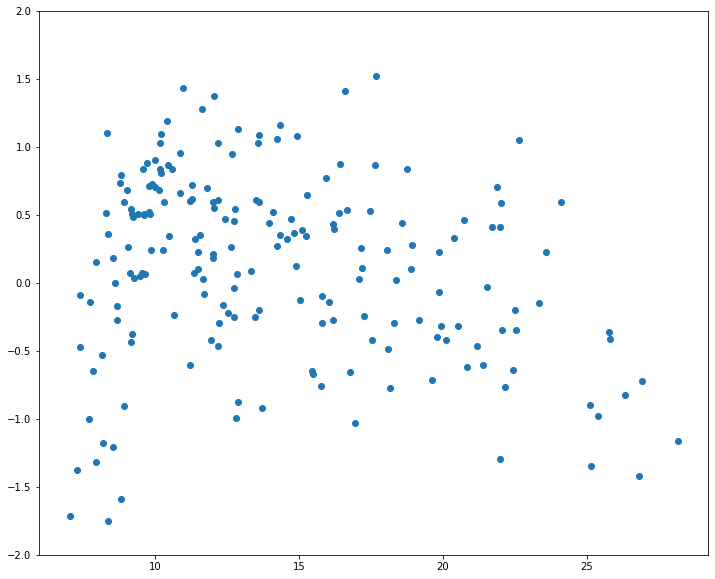

In [46]:
# Looks like a non-random shape. Data ppear slightly non-linear though
# not too bad
plt.figure(figsize=(12,10))
plt.scatter(results.predict(adv), resid)
plt.ylim(-2, 2)

# **Lab**

In [47]:
boston = pd.read_csv('https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Boston.csv')
boston.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


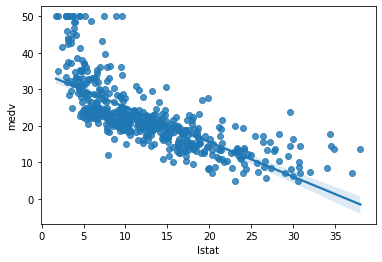

In [48]:
sns.regplot('lstat', 'medv', data=boston)

In [49]:
#statsmodels
results = smf.ols('medv ~ lstat', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           5.08e-88
Time:                        12:52:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

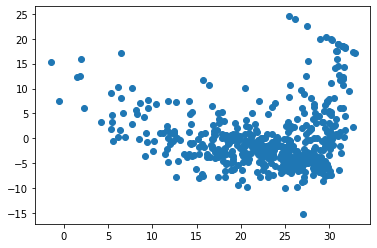

In [50]:
# Look at the residuals
# Yikes! Lots of non-linearity. Need a different model
plt.scatter(results.fittedvalues, results.resid)

In [51]:
# Get all columns. No easy way to do this like in R
# Mostly highly significant variables
string_cols = ' + '.join(boston.columns[:-1])
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 30 Oct 2021   Prob (F-statistic):          6.72e-135
Time:                        12:52:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Remove age
string_cols = ' + '.join(boston.columns[:-1].difference(['age']))
results = smf.ols('medv ~ {}'.format(string_cols), data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sat, 30 Oct 2021   Prob (F-statistic):          6.08e-136
Time:                        12:52:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
black          0.0093      0.003      3.481      0.001       0.004       0.015
chas           2.6890      0.860      3.128      0.002       1.000       4.378
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
rad            0.3058      0.066      4.627      0.000       0.176       0.436
rm             3.8144      0.408      9.338      0.000       3.012       4.617
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Interaction 
results = smf.ols('medv ~ lstat*age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           4.86e-88
Time:                        12:52:40   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Interaction
results = smf.ols('medv ~ lstat + np.power(lstat, 2)', data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 30 Oct 2021   Prob (F-statistic):          1.56e-112
Time:                        12:52:40   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
from statsmodels.stats.anova import anova_lm

In [56]:
results1 = smf.ols('medv ~ lstat', data=boston).fit()
results2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

anova_lm(results1, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


In [57]:
# Manually compute F
(results1.ssr - results2.ssr) / (results2.ssr / results2.df_resid)

135.19982210087164

In [58]:
anova_lm(results1)

,df,sum_sq,mean_sq,F,PR(>F)
lstat,1.0,23243.913997,23243.913997,601.617871,5.081103e-88
Residual,504.0,19472.381418,38.635677,NaN,NaN


In [59]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           5.08e-88
Time:                        12:52:41   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
carseats = pd.read_csv('https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Carseats.csv')
carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [62]:
results = smf.ols('Sales ~ ShelveLoc', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           1.27e-33
Time:                        12:53:15   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.5229      0.239     23.131      0.000       5.054       5.992
ShelveLoc[T.Good]       4.6911      0.348     13.464      0.000       4.006       5.376
ShelveLoc[T.Medium]     1.7837      0.286      6.229      0.000       1.221       2.347
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Problem Eight**

In [64]:
auto = pd.read_csv('https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Auto%202.csv')
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [65]:
results = smf.ols('mpg ~ horsepower', data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           7.03e-81
Time:                        12:53:44   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is evidence of a strong relationship between mpg and horsepower. Just from the summary, it is a very strong as the t-statistic is -24 though there is still lots of variation left in the model with an R-Squared of .606. The relationship is negative. 

In [66]:
results.conf_int()

,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [67]:
results.params['Intercept'] + results.params['horsepower'] * 98

24.46707715251243

In [68]:
results.conf_int()

,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [69]:
results.bse

Intercept     0.717499
horsepower    0.006446
dtype: float64

In [70]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats

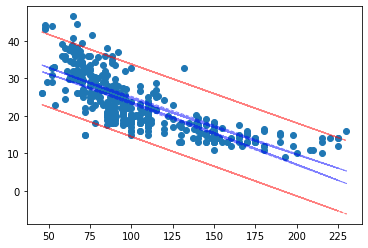

In [71]:
st, data, ss2 = summary_table(results, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

# wls cinv
prstd, iv_1, iv_u = wls_prediction_std(results)

# plot OLS
cil, = plt.plot(auto['horsepower'], predict_ci_low, 'r--', lw=1, alpha=0.5)
ciu, = plt.plot(auto['horsepower'], predict_ci_upp, 'r--', lw=1, alpha=0.5)
mcil, = plt.plot(auto['horsepower'], predict_mean_ci_low, 'b--', lw=1, alpha=0.5)
mciu, = plt.plot(auto['horsepower'], predict_mean_ci_upp, 'b--', lw=1, alpha=0.5)

plt.scatter(auto['horsepower'], auto['mpg'])

In [72]:
# Create function to compute confidence or prediction interval given an x value

def create_interval(ols_result, interval_type, alpha, x_values, conf_x):
    if interval_type == 'confidence':
        add_one = 0
    elif interval_type == 'prediction':
        add_one = 1
    else:
        print("Choose interval_type as confidence or prediction")
        return
    n = len(x_values)
    t_value = stats.t.ppf(1 - alpha / 2, df = n - 2)
    sy = np.sqrt((ols_result.resid ** 2).sum() / (n - 2))
    numerator = (conf_x - x_values.mean()) ** 2
    denominator = ((x_values - x_values.mean()) ** 2).sum()
    interval = t_value * sy * np.sqrt(add_one + 1 / n + numerator / denominator)
    prediction = results.params[0] + results.params[1] * conf_x
    return (prediction - interval, prediction + interval)

In [73]:
create_interval(results, 'confidence', .05, auto['horsepower'], 98)

(23.973078960703944, 24.961075344320918)

In [74]:
create_interval(results, 'prediction', .05, auto['horsepower'], 98)

(14.809396070967123, 34.12475823405774)

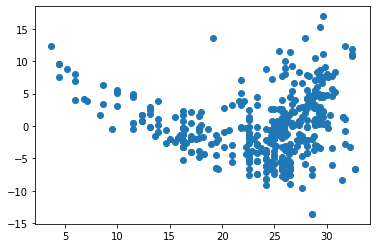

In [75]:
# Severe problems with the data
plt.scatter(results.fittedvalues, results.resid)

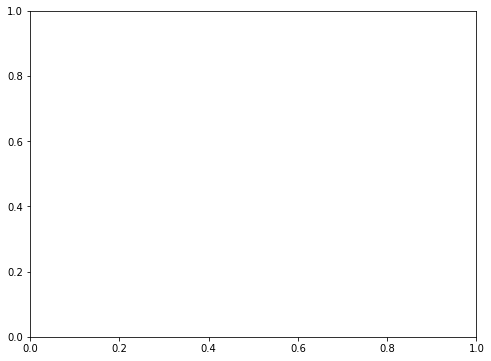

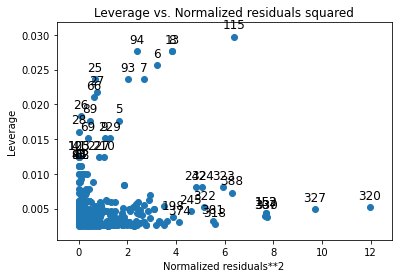

In [76]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax=ax)

# **Problem Nine**

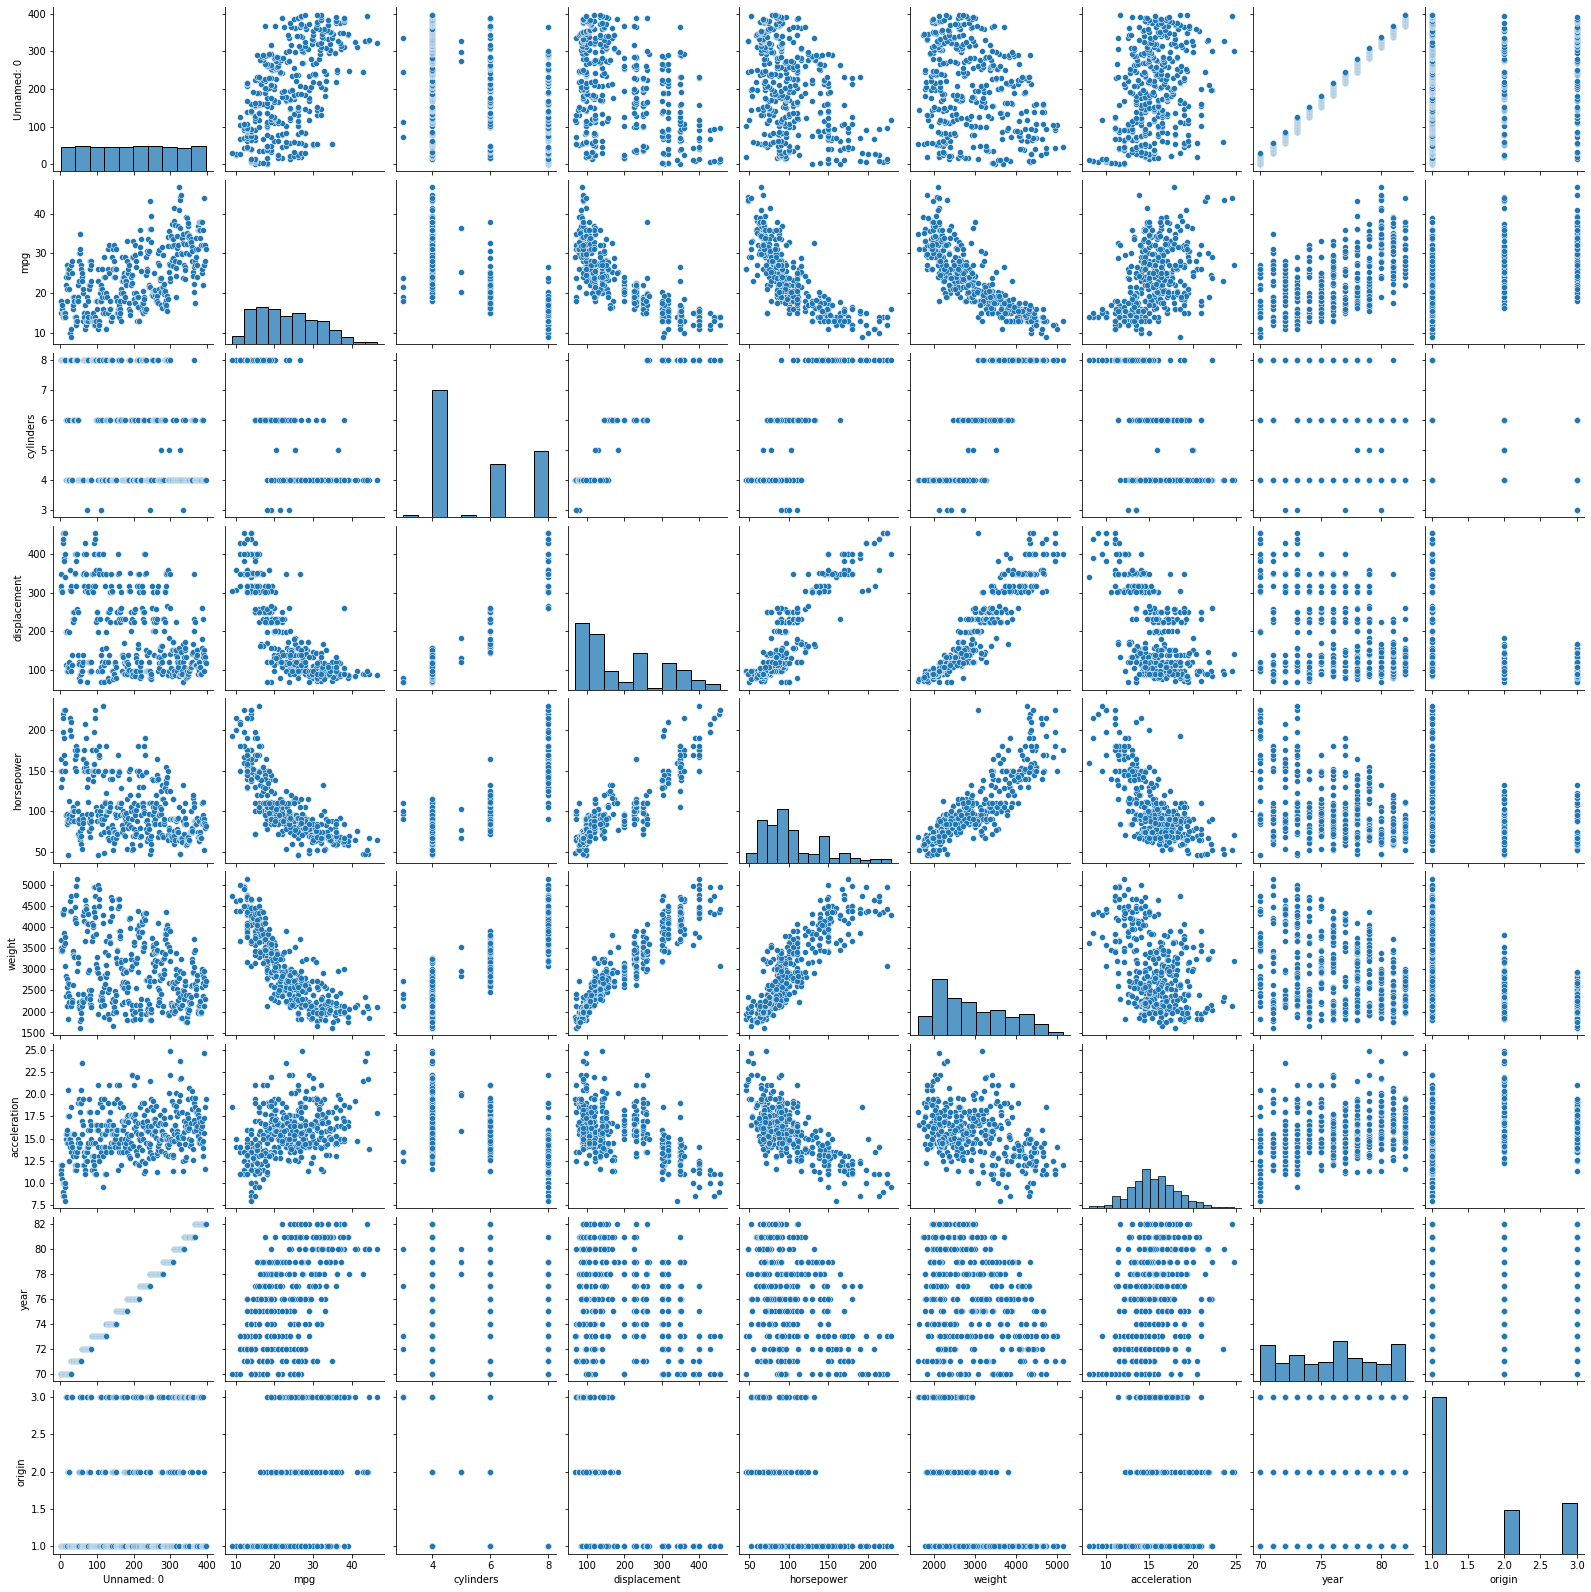

In [77]:
sns.pairplot(auto)

In [78]:
auto.corr()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
Unnamed: 0,1.000000,0.586330,-0.360275,-0.387146,-0.422925,-0.321747,0.290985,0.996780,0.200576
mpg,0.586330,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.360275,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.387146,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.422925,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.321747,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.290985,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.996780,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.200576,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [79]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])
formula

'mpg ~ mpg + cylinders + displacement + horsepower + weight + acceleration + year + origin'

In [80]:
results = smf.ols(formula, data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.318e+27
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:54:36   Log-Likelihood:                 10301.
No. Observations:                 392   AIC:                        -2.058e+04
Df Residuals:                     383   BIC:                        -2.055e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.332e-13   1.35e-12     -0.471      0.638   -3.28e-12    2.01e-12
mpg              1.0000   1.45e-14   6.88e+13      0.000       1.000       1.000
cylinders    -9.548e-15   9.23e-14     -0.103      0.918   -1.91e-13    1.72e-13
displacement  1.856e-16   2.16e-15      0.086      0.932   -4.06e-15    4.43e-15
horsepower    -1.28e-15   3.93e-15     -0.326      0.745   -9.01e-15    6.45e-15
weight       -2.472e-17   2.08e-16     -0.119      0.906   -4.34e-16    3.84e-16
acceleration  4.996e-16   2.82e-14      0.018      0.986   -5.49e-14    5.59e-14
year          9.159e-16   1.82e-14      0.050      0.960   -3.48e-14    3.66e-14
origin                0   8.18e-14          0      1.000   -1.61e-13    1.61e-13
==============================================================================
Omnibus:                       16.897   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.881
Skew:                           0.494   Prob(JB):                     0.000131
Kurtosis:                       3.347   Cond. No.                     8.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a clear relationship between the predictor and the response. The F-Stat is very high. 

Displacement, Weight, Year, and Origin and statistically signficiant. 

The relationship is positive so the higher the year the more the mpg

## **Look at diagnostic plots**

In [81]:
results_influence = OLSInfluence(results)

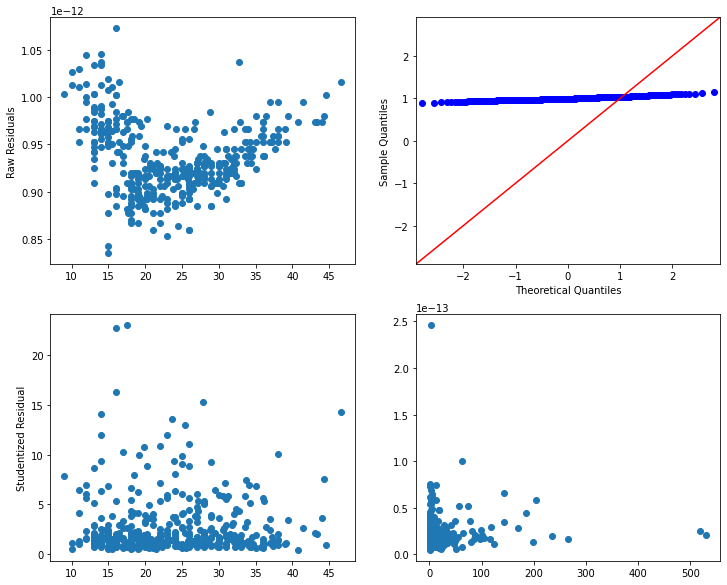

In [82]:
import statsmodels.api as sm


# looks very similar to previous problem
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].scatter(results.fittedvalues, results.resid)
ax[0, 0].set_ylabel("Raw Residuals")
ax[1, 0].scatter(results.fittedvalues, results_influence.resid_studentized_external)
ax[1, 0].set_ylabel("Studentized Residual")
sm.graphics.qqplot(results.resid / np.sqrt((results.resid ** 2).sum() / 390), line='45', ax=ax[0, 1])
ax[1, 1].scatter(results_influence.resid_studentized_external ** 2, results_influence.influence);